## Student Performance Indicator


Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem Statement
Understanding how student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2 Import Data and Required Packages

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df.shape

(1000, 8)

#### 2.1 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Cleaning

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [35]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No null values 

In [36]:
df.duplicated().sum()

np.int64(0)

No duplicate values

### 4) Data Exploration

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [39]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Approximately similar statistics
- mean and std similar 
- but minimum value varies

In [40]:
[col for col in df.columns if df[col].dtype == "O"]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [41]:
# or by using select_dtypes
cat_cols = df.select_dtypes(include="object")
num_cols = df.select_dtypes(exclude="object")

print(cat_cols)
print(num_cols)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  
0                      none  
1                 completed  
2                      none  
3              

### 5) Feature Engineering

In [42]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
reading_full = int(df[df['reading score'] == 100]['average'].count())
writing_full = int(df[df['writing score'] == 100]['average'].count())
math_full = int(df[df['math score'] == 100]['average'].count())

In [44]:
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [45]:
reading_less_20 = int(df[df['reading score'] <= 20]['average'].count())
writing_less_20 = int(df[df['writing score'] <= 20]['average'].count())
math_less_20 = int(df[df['math score'] <= 20]['average'].count())

In [46]:
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 6) Visualizations

#### Checking Distributions

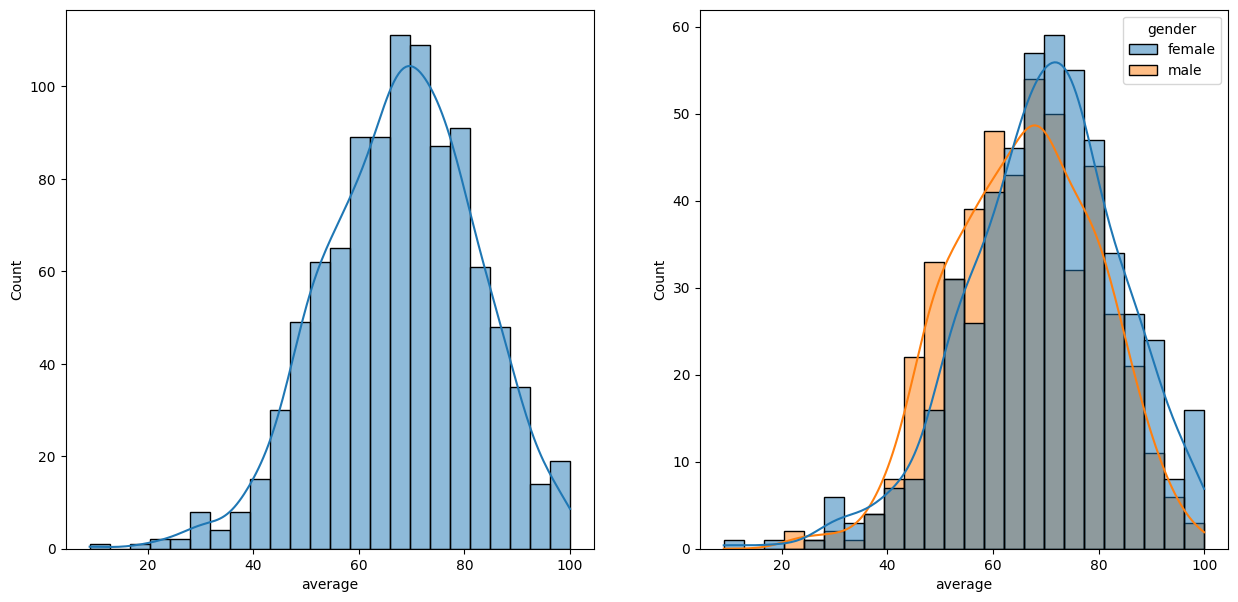

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df['average'], kde = True)
plt.subplot(122)
sns.histplot(x = 'average', kde = True, hue = 'gender',data = df)
plt.show()

Insight - Female average score is higher than male average score

In [48]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

In [49]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [50]:
def make_distributions(data, column, hue_col = None):
    fig, axs = plt.subplots(1, 3, figsize=(15, 7))
    plt.subplot(131)
    sns.histplot(data = data, kde = True, x = column)
    plt.subplot(132)
    sns.histplot(x = column, kde = True, data = df[df.gender=='male'], hue = hue_col)
    axs[1].set_ylabel("Male")
    plt.subplot(133)
    sns.histplot(x = column, kde = True, data = df[df.gender=='female'], hue = hue_col)
    axs[2].set_ylabel("Female")
    plt.show()

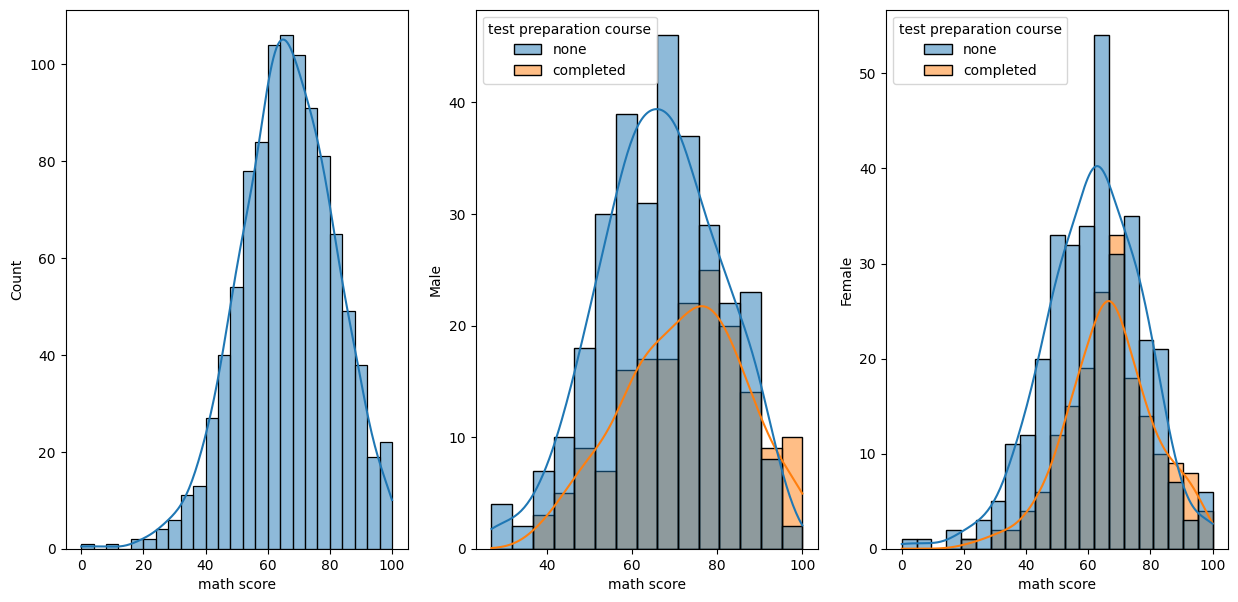

In [51]:
make_distributions(df, 'math score', 'test preparation course')

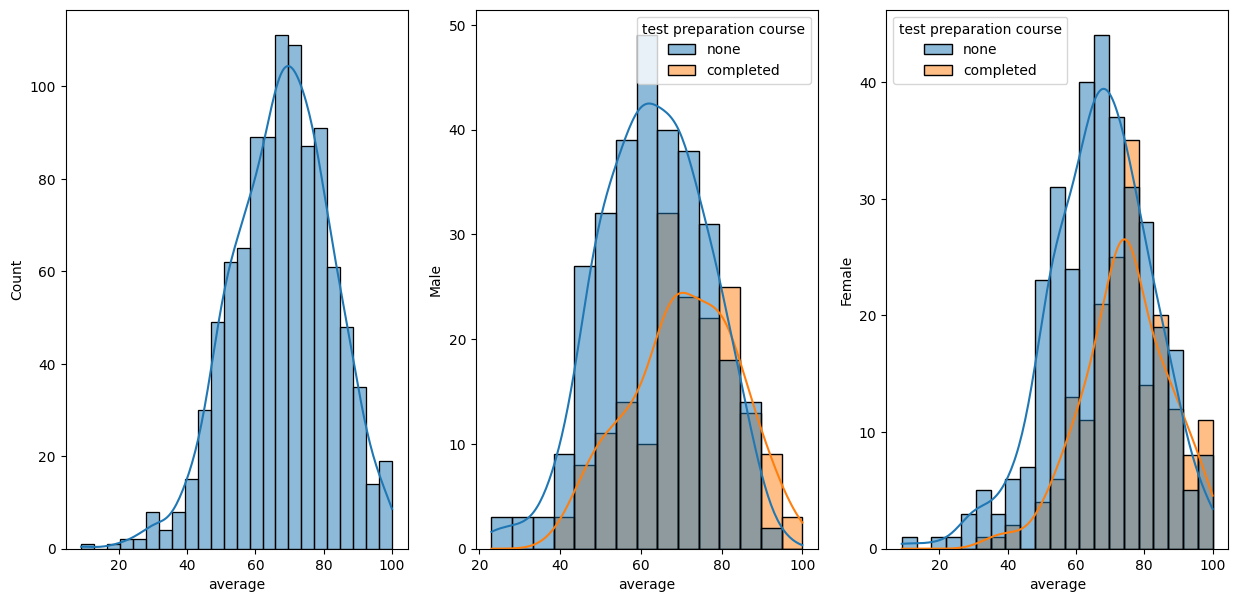

In [52]:
make_distributions(df, 'average', 'test preparation course')

Insights - Those who completed the preparation course , secured more marks as can be seen from the average marks distribution more shifted to right for completed course , but we see that less no. of students completed it for both male and female students

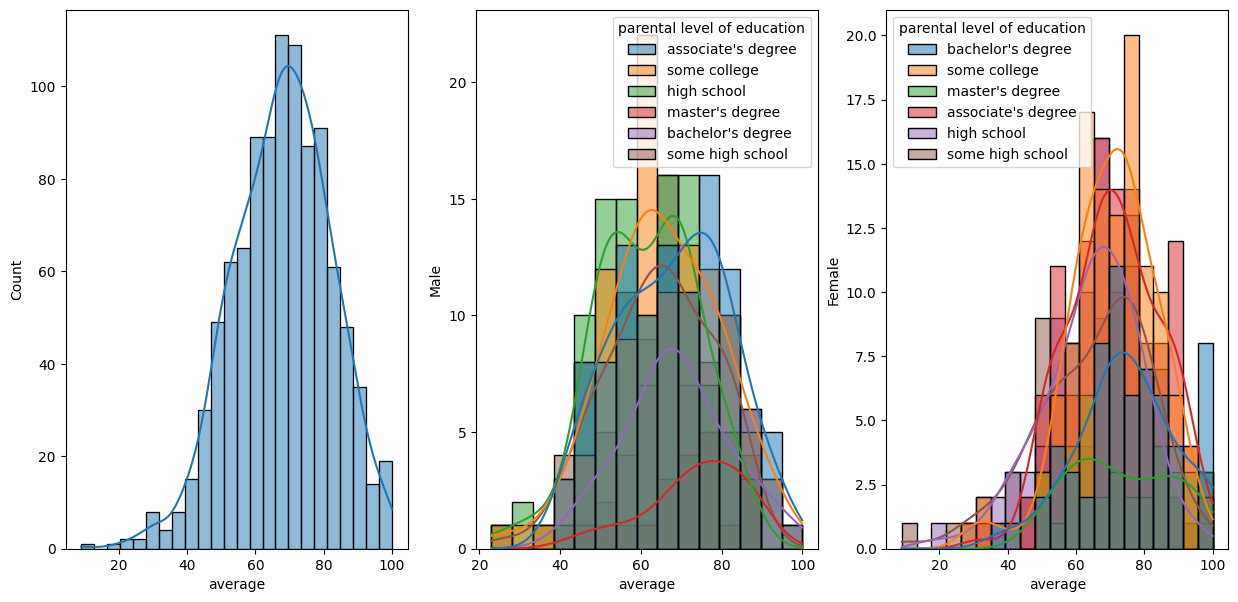

In [53]:
make_distributions(df, 'average', 'parental level of education')

Insights - High Parental education level seems to be contributing to higher average score among students

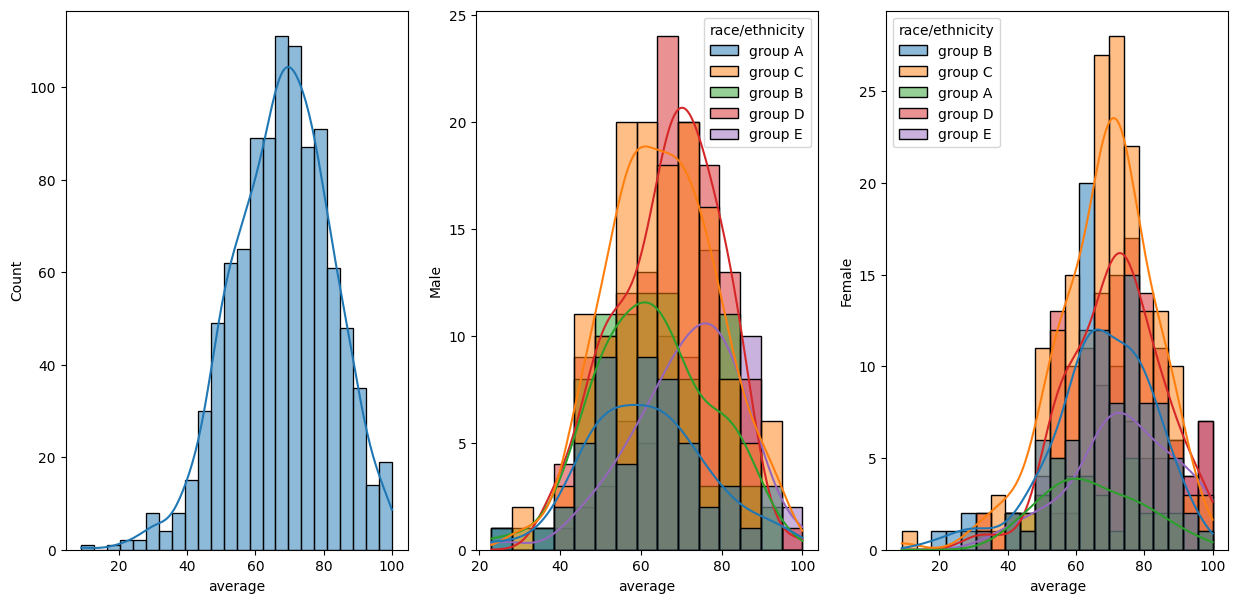

In [54]:
make_distributions(df, 'average', 'race/ethnicity')

insight - group a and b perform poor for both male and female students while group e performs well for male students

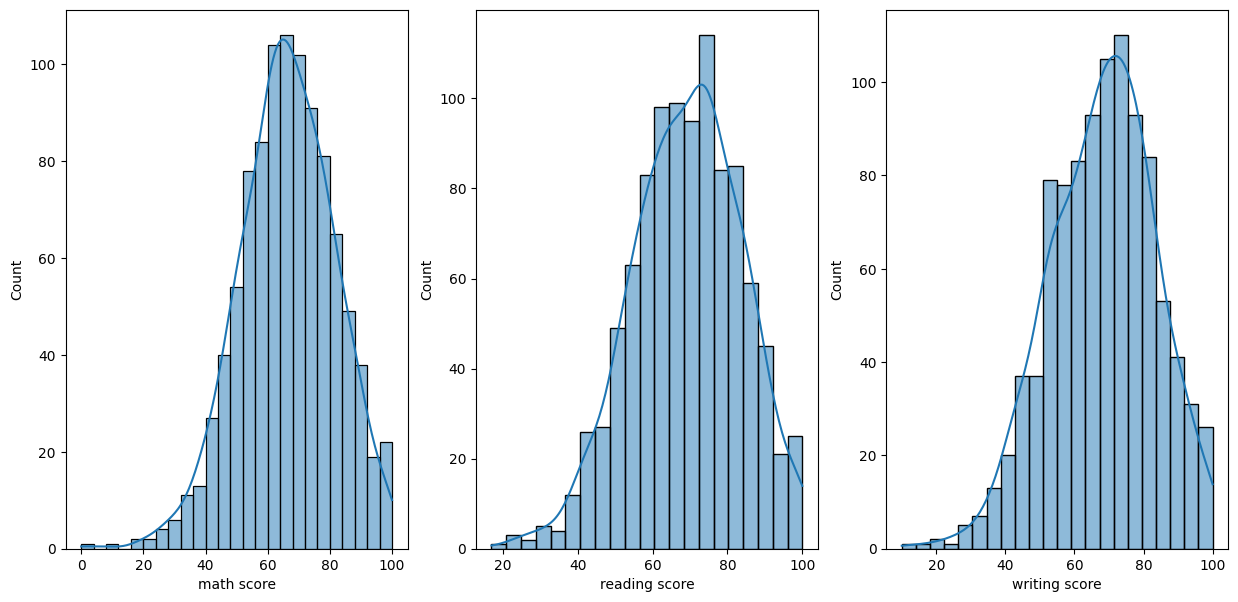

In [55]:
## comparision of distribution of marks in different subjects 
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(df['math score'], kde = True)
plt.subplot(132)
sns.histplot(df['reading score'], kde = True)
plt.subplot(133)
sns.histplot(df['writing score'], kde = True)
plt.show()

Insights  - The distribution of these subject marks is almost similar 

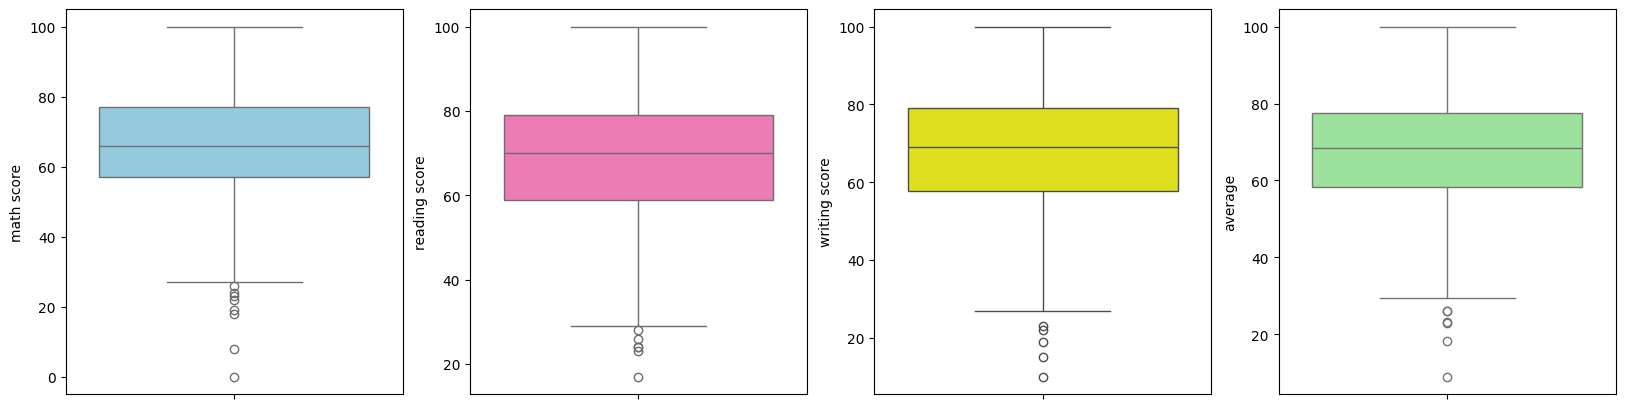

In [57]:
#Checking outliers 
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

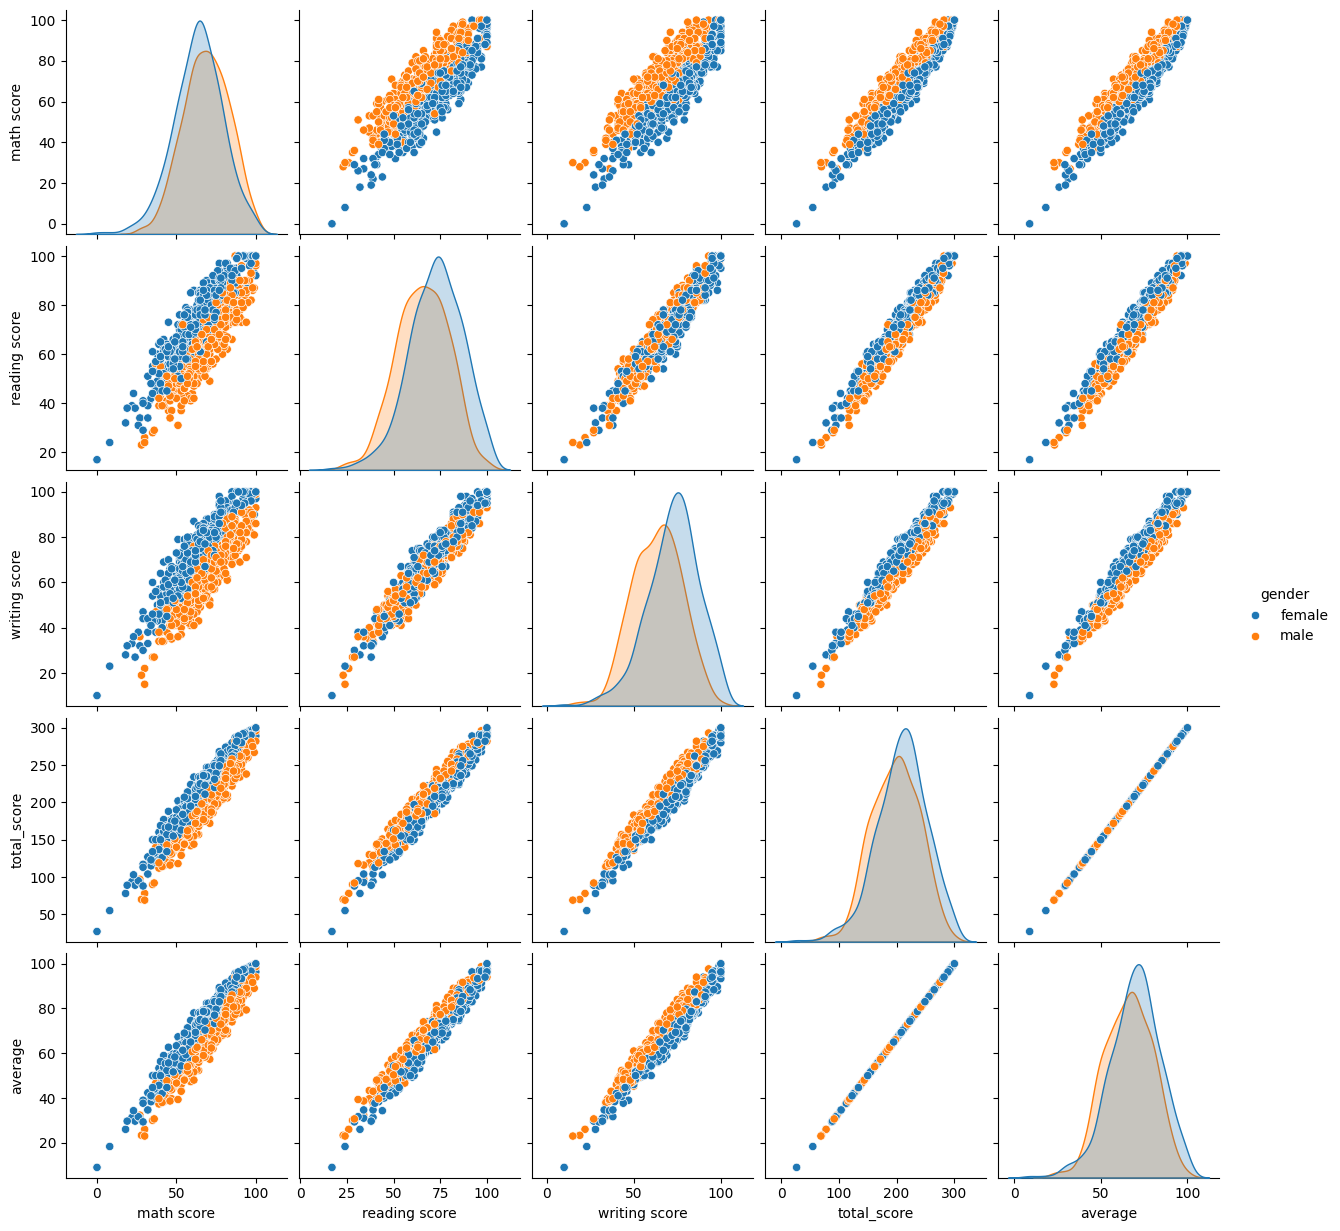

In [59]:
# scores are linearly related with each other
sns.pairplot(df,hue = 'gender')
plt.show()

<Axes: xlabel='lunch', ylabel='writing score'>

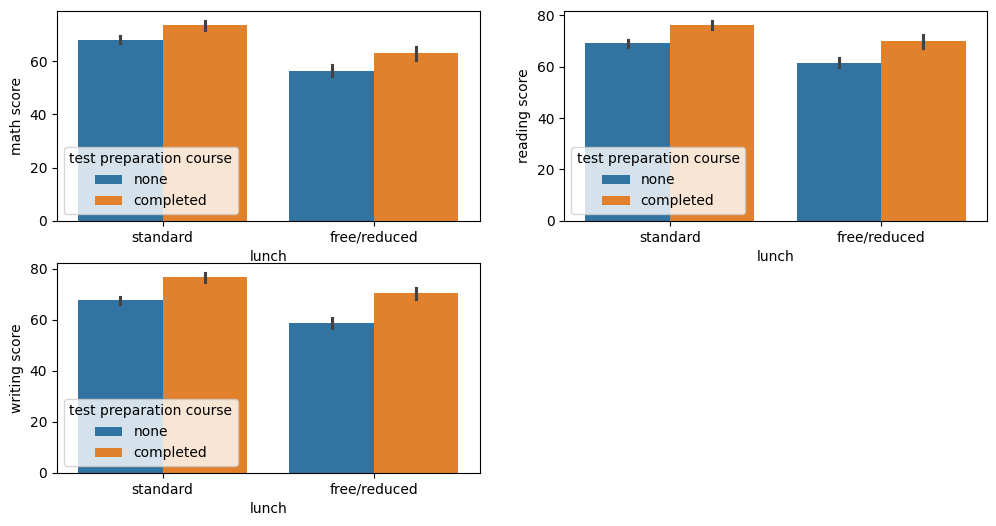

In [ ]:
# impact of test preparation course on scores
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

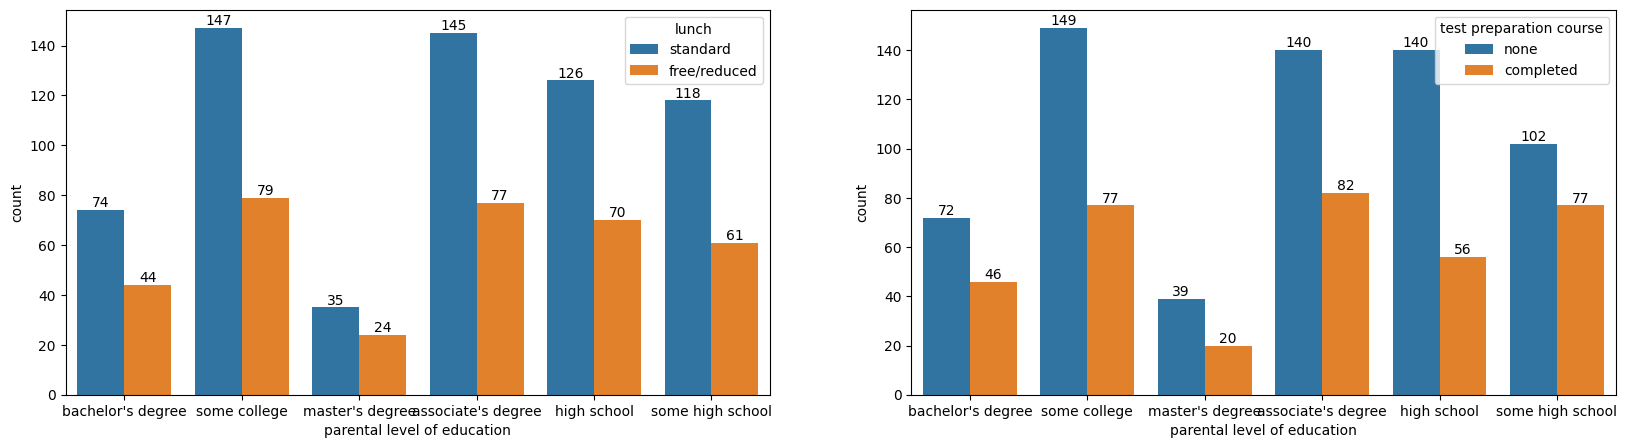

In [73]:
# analysing parental level of eductaion with lunch and test preparation course
f,ax = plt.subplots(1,2, figsize=(20,5))

sns.countplot(x = 'parental level of education', data = df, ax = ax[0], hue = 'lunch')
# labeling the bars
for bar in ax[0].containers:
    ax[0].bar_label(bar)

sns.countplot(x = 'parental level of education', data = df, ax = ax[1], hue = 'test preparation course')
for bar in ax[1].containers:
    ax[1].bar_label(bar)

plt.show()

C:\Users\urvas\AppData\Local\Temp\ipykernel_18648\961052203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


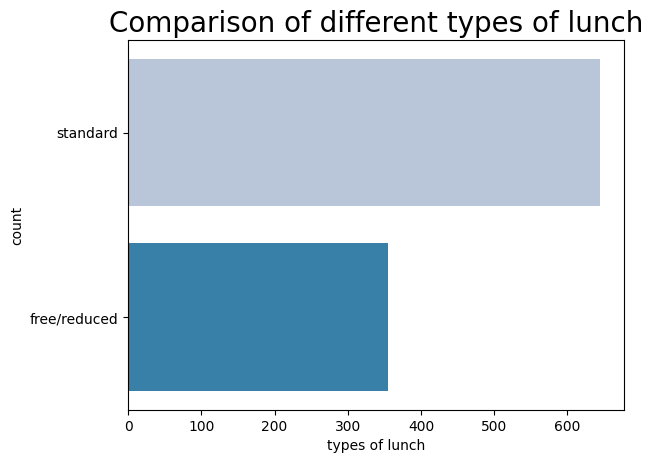

In [76]:
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

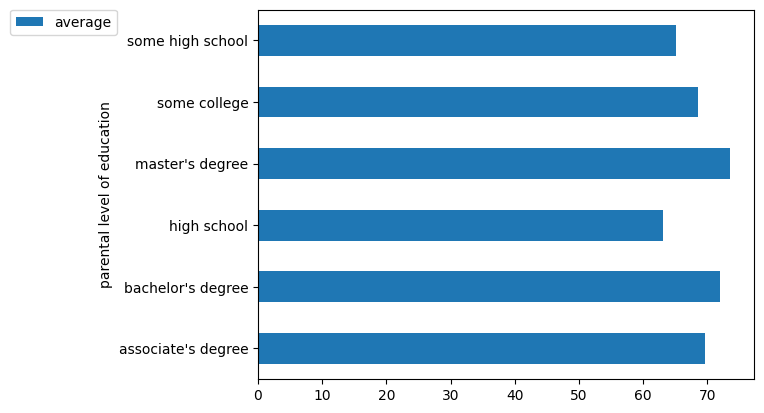

In [88]:
df.groupby('parental level of education')['average'].agg('mean').plot(kind='barh')
plt.legend(bbox_to_anchor=(-0.5,1), loc = 2, borderaxespad=0.)

<Axes: xlabel='gender'>

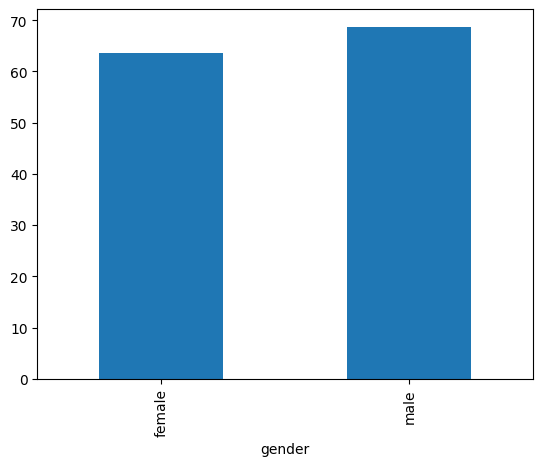

In [94]:
df.groupby('gender')['math score'].mean().plot(kind = 'bar')

In [104]:
gender_group

,average,math score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


          average  math score
gender                       
female  69.569498   63.633205
male    65.837483   68.728216


C:\Users\urvas\AppData\Local\Temp\ipykernel_18648\469520981.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average'][0], gender_group['math score'][0]]
C:\Users\urvas\AppData\Local\Temp\ipykernel_18648\469520981.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average'][1], gender_group['math score'][1]]


<Figure size 1000x800 with 0 Axes>

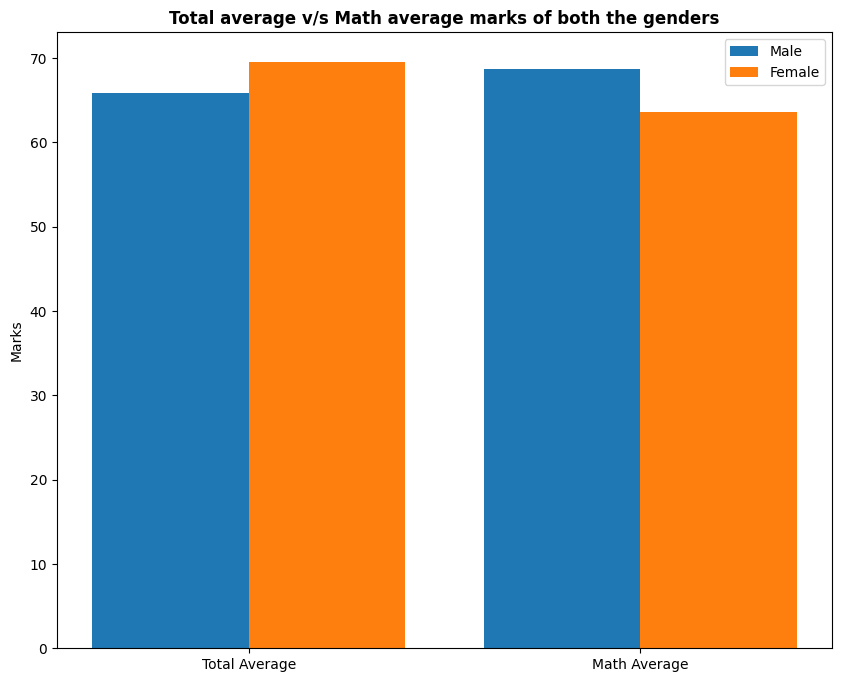

In [101]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

gender_group = df.groupby('gender')[['average','math score']].mean()
print(gender_group)

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

In [110]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

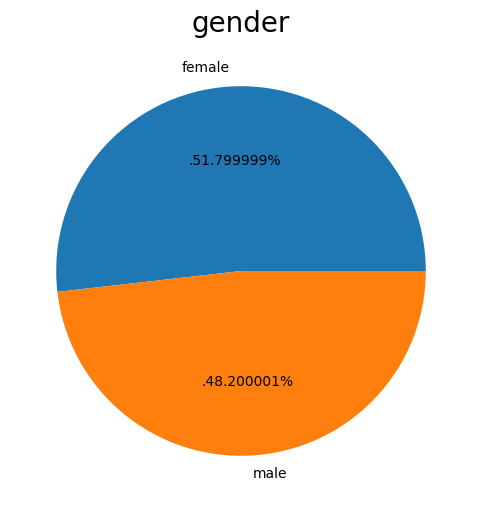

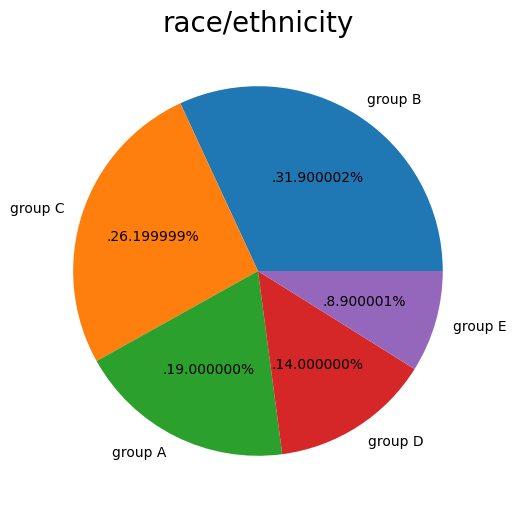

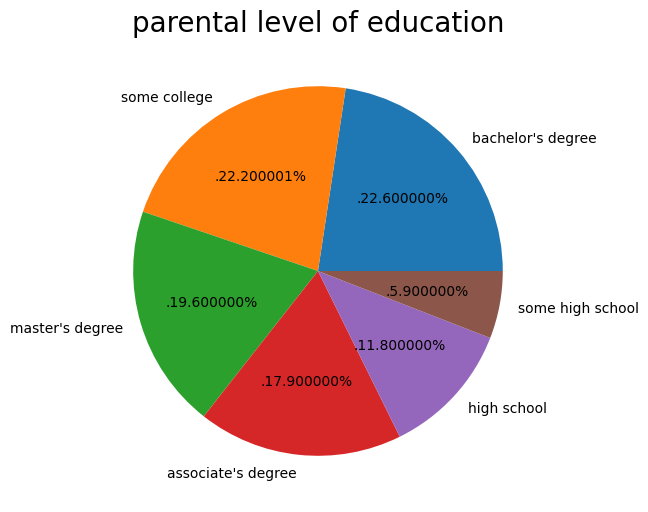

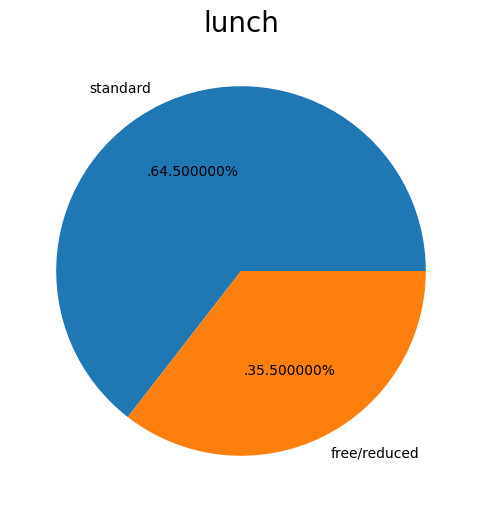

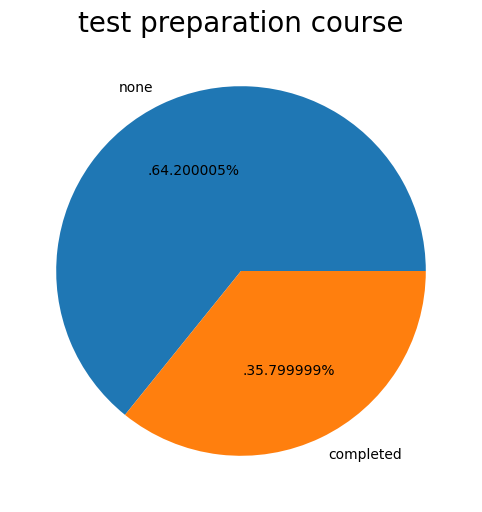

In [111]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))
    size = df[col].value_counts()
    labels = df[col].unique()


    plt.pie(size, labels = labels,autopct = '.%2f%%')
    plt.title(col, fontsize = 20)
    plt.axis('off')
    plt.show()

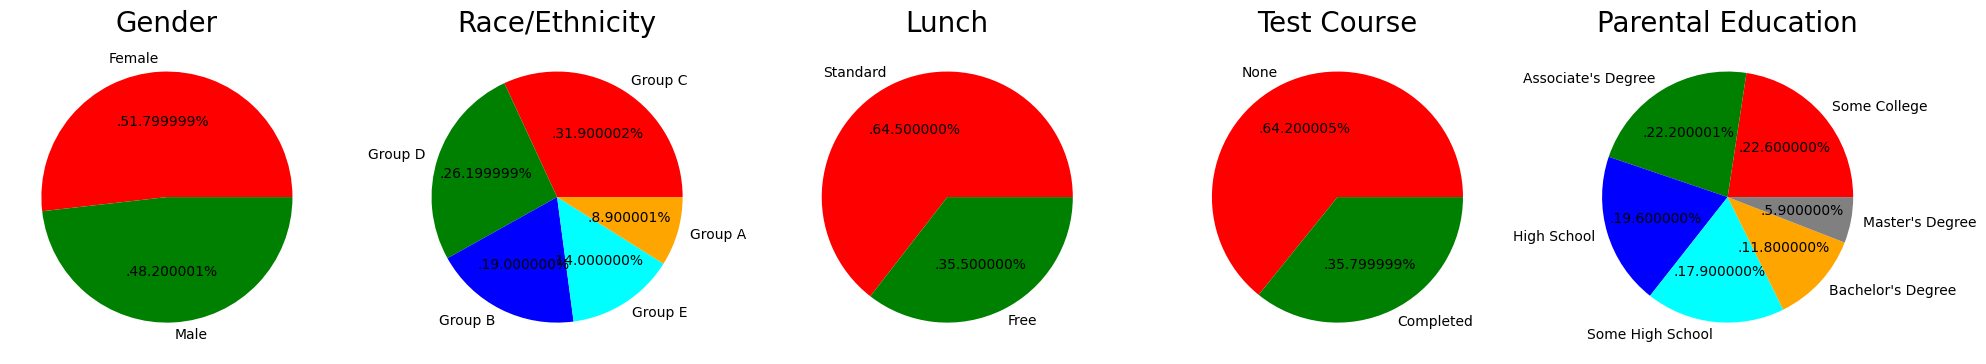

In [106]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 5. Conclusions
- Student's Performance is related with almost all other columns